# APST1 : Projet Data Challenge 
# Predicting odor compound concentrations


Nous avons choisi de travailler sur le projet *Predicting odor compound concentrations* proposé par Veolia.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Exploration des données 

### Importation des données

In [2]:
x_train = pd.read_csv('Data\input_train_wide_format.csv', sep=',', index_col=0)
y_train=pd.read_csv('Data\output_train_wide_format.csv', sep=',', index_col=0)
x_test=pd.read_csv('Data\input_test_wide_format_b10i0rq.csv', sep=',', index_col=0)

In [3]:
#Nouvelle importation des données comme nous n'avons pas travaillé sur le même ordinateur
input_train = pd.read_csv('Data\input_train_wide_format.csv', sep=',', index_col=0)
output_train=pd.read_csv('Data\output_train_wide_format.csv', sep=',', index_col=0)
input_test=pd.read_csv('Data\input_test_wide_format_b10i0rq.csv', sep=',', index_col=0)
features=input_train.columns

### Descrition / Visualisation des données

Un avantage de ce sujet est son contexte à la fois concret et simple à appréhender. S'y intérésser nous a permis d'avoir une meilleure vision du problème ainsi qu'une meilleure intuition quant à l'importance de chaque station ainsi que le rôle joué par les différentes features.
Nous commencons par récuperer les coordonnées des stations que nous visualisons grâce au logiciel QGIS. 

In [ ]:
L=input_train.loc[1]
stations=['HRI', 'HVH', 'MAS', 'STA', 'CAU', 'GOR', 'HAR']
x_coord_label, y_coord_label = ['x_wgs84_' + s + '-1' for s in stations], ['y_wgs84_' + s + '-1' for s in stations]
x_coord, y_coord = L[x_coord_label], L[y_coord_label]

coord = pd.DataFrame({'x_wgs84' : [x for x in x_coord], 'y_wgs_84' : [y for y in y_coord]}, index = stations)

#coord.to_csv('stations_coordinates.csv')
coord

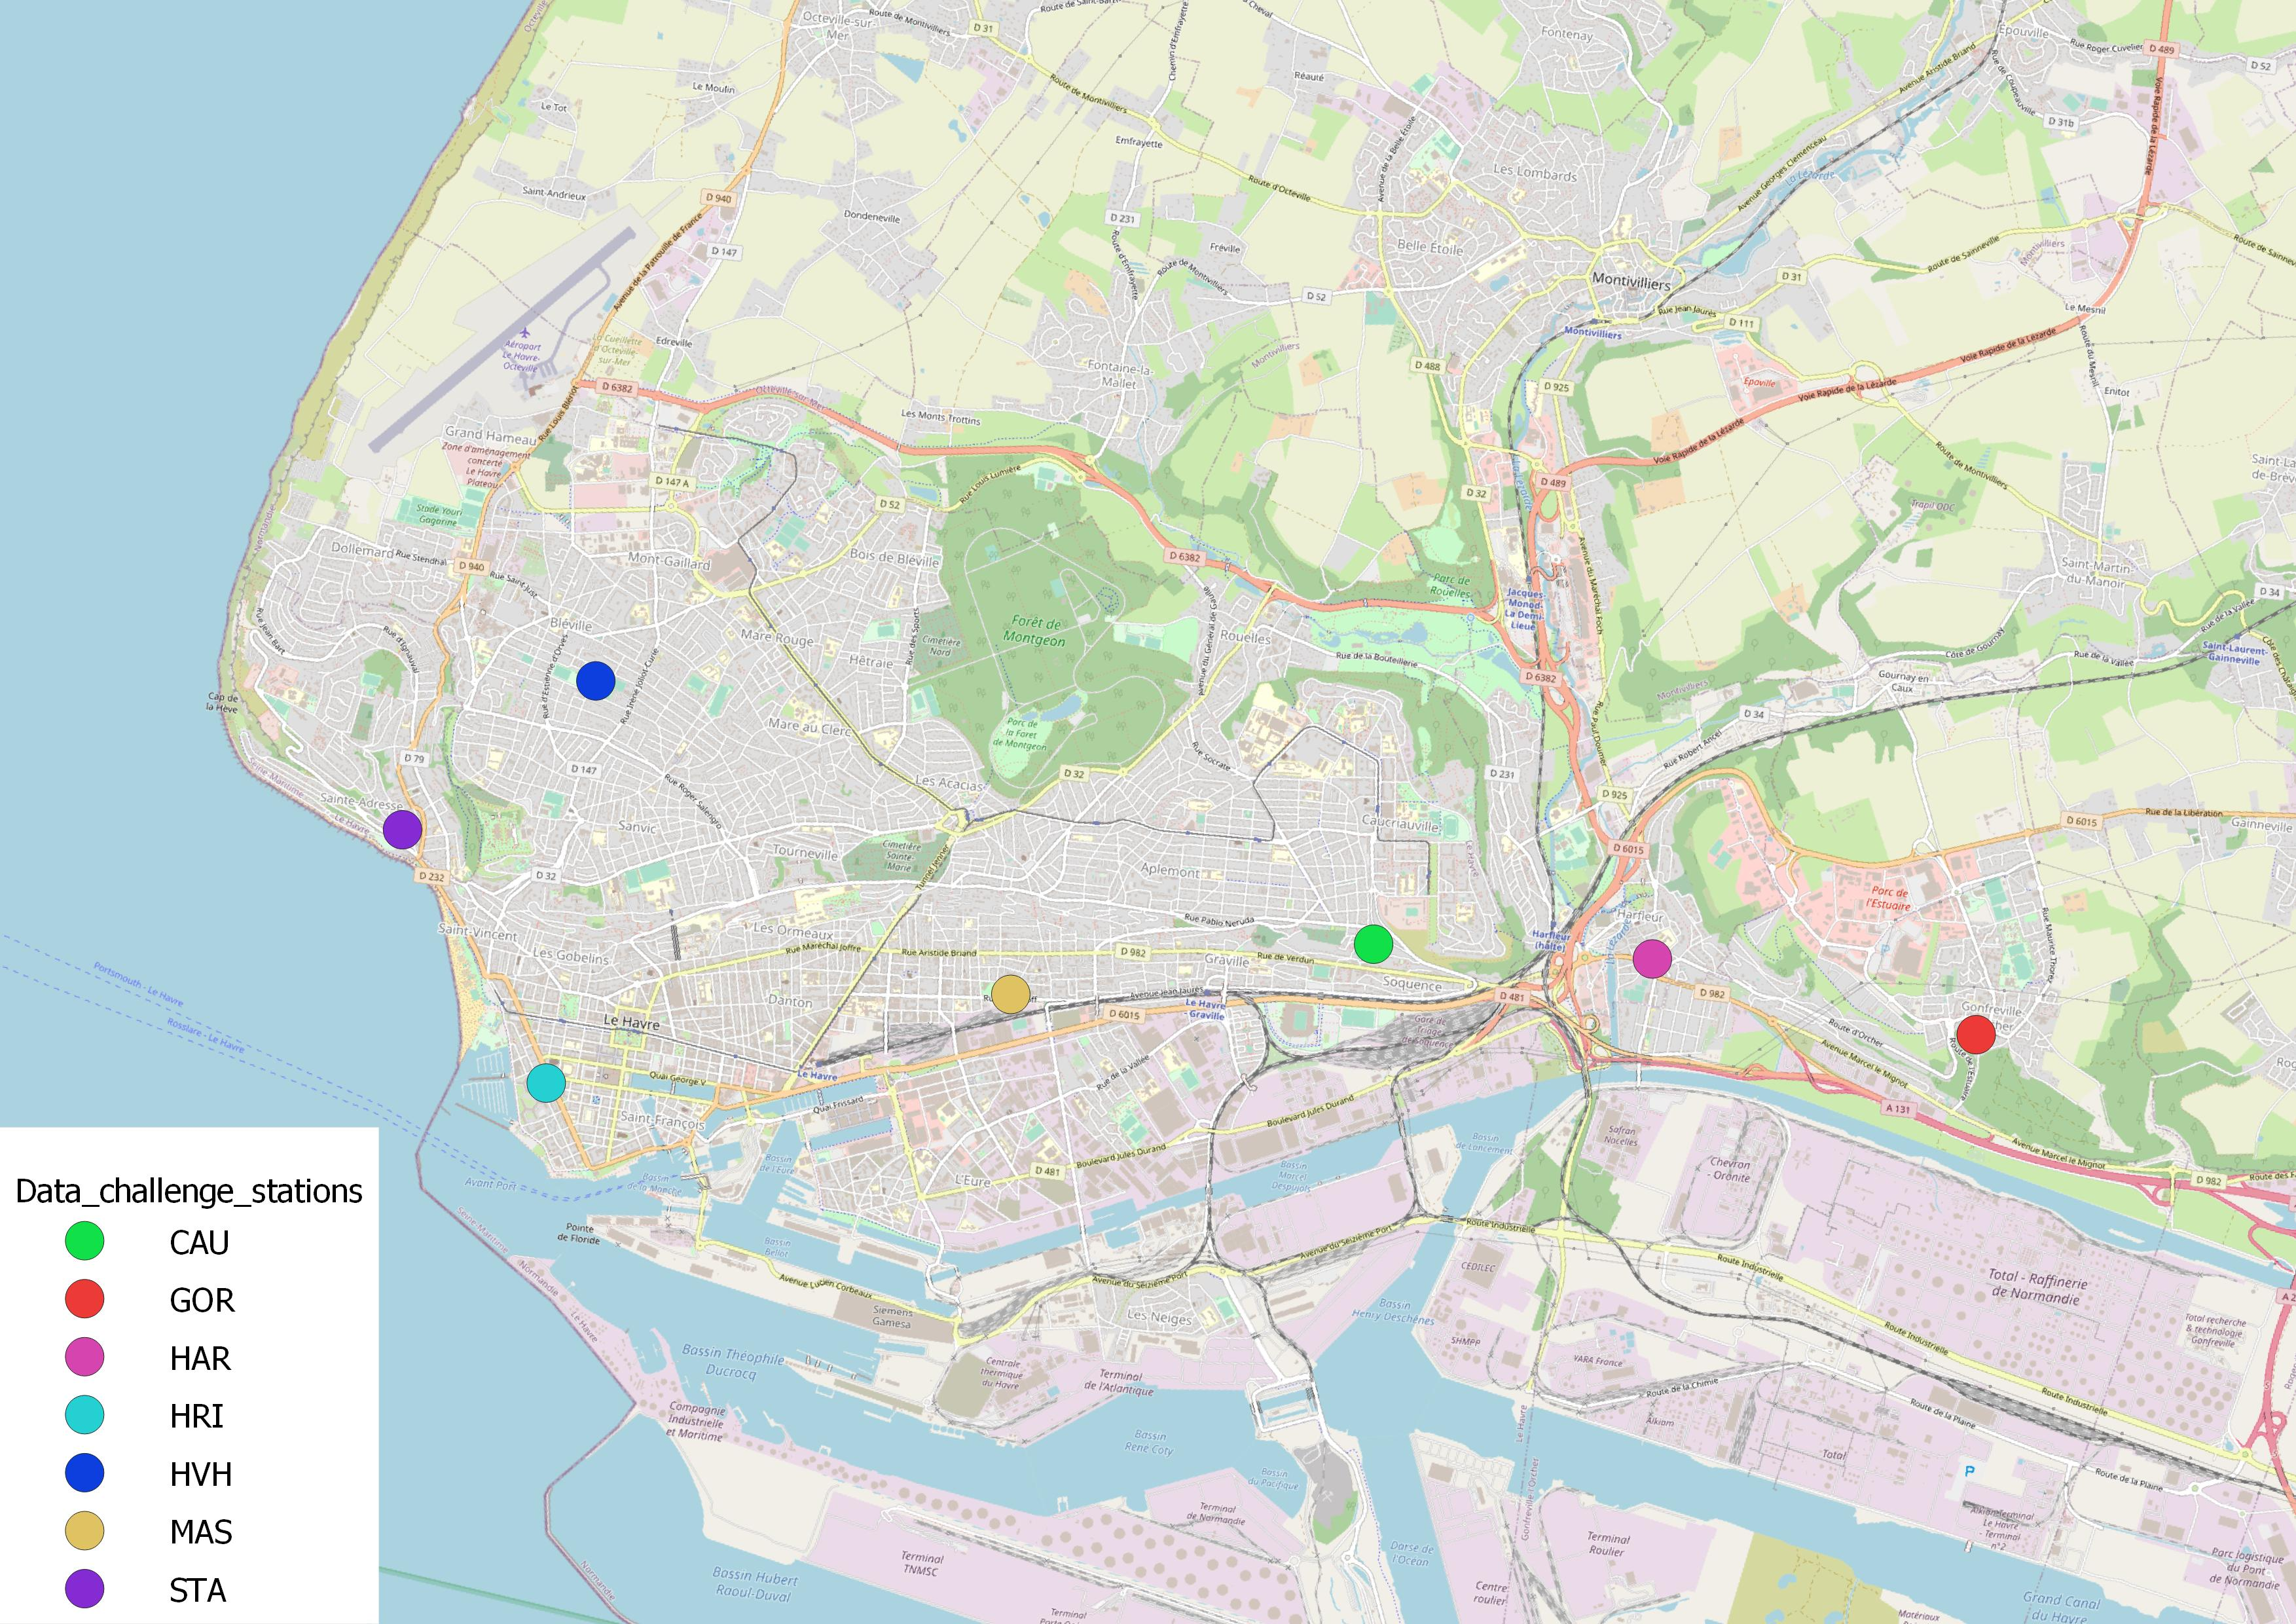

Puis, nous visualisons les concentrations en dioxyde de soufre dans les stations pour des instants et durées variables :

In [ ]:
#Visualisation des concentrations en SO2

n_heures=500 #nombre d'heures à afficher
heure_start=0 #ligne de départ dans le tableau output

stations1=['HRI', 'HVH', 'STA','CAU','GOR','HAR']
#stations1=['CAU']
so2_labels_1=['SO2_' + s + '-48' for s in stations1]

input_index=np.arange(heure_start+48, heure_start+48+n_heures, 1)
output_index=np.arange(heure_start, heure_start+n_heures, 1)
Y_vis = output_train.loc[output_index]['SO2_MAS+0'].to_numpy() #quand on regarde le dataset de plus près, on s'aperçoit qu'une colonne correspond à l'évolution des features heure par heure
X_vis = input_train.loc[input_index][so2_labels_1].to_numpy()

Colors=['c','b','darkviolet','lime','r','fuchsia','k']

plt.figure(figsize=(16,8))
x=np.arange(heure_start, heure_start+len(Y_vis))
for i in range(len(stations1)):
  plt.plot(x,X_vis[:,i], c=Colors[i], label=stations1[i])
plt.plot(x,Y_vis, c=Colors[-1], label='MAS', linewidth=3)
plt.legend(prop={'size': 15})
plt.xlabel('temps (heure)', size=15)
plt.ylabel('Concentration so2 (μg / m³)', size=15)

In [ ]:
n_heures=6000
heure_start=0 #ligne de départ dans le tableau output

stations1=['HVH']
so2_labels_1=['SO2_' + s + '-48' for s in stations1]

input_index=np.arange(heure_start+48, heure_start+48+n_heures, 1)
output_index=np.arange(heure_start, heure_start+n_heures, 1)
Y_vis = output_train.loc[output_index]['SO2_MAS+0'].to_numpy()
X_vis = input_train.loc[input_index][so2_labels_1].to_numpy()

plt.scatter(np.log(1+X_vis), np.log(1 + Y_vis))
plt.xlabel('log(1+log(SO2_' + stations1[0] + '))', size=15)
plt.ylabel('1+log(SO2_MAS)', size=15)

Enfin, nous visualisons d'autres features afin de détecter une éventuelle corrélation avec la grandeur à prédire :

In [ ]:
#Visualisation d'une ou plusieurs features au choix

from sklearn.preprocessing import MinMaxScaler

n_heures=200 #nombre d'heures à afficher
heure_start=100 #ligne de départ dans le tableau output

selected_features_vis=['windDirection','windSpeed'] #features qu'on veut afficher
sf_bool_vis=[any(sf in f for sf in selected_features_vis) and f[-3:]=='-48' for f in features]
selected_features_vis=features[sf_bool_vis]

input_index=np.arange(heure_start+48, heure_start+48+n_heures, 1)
output_index=np.arange(heure_start, heure_start+n_heures, 1)
Y_vis = output_train.loc[output_index]['SO2_MAS+0'].to_numpy()
X_vis = input_train.loc[input_index][selected_features_vis].to_numpy()
scaler_x_vis = MinMaxScaler(feature_range=(0, 1)) # normalisation des features (optionnel)
X_vis = scaler_x_vis.fit_transform(X_vis)
Y_vis = Y_vis

Colors=['c','b','darkviolet','lime','r','fuchsia','orange','yellow']

fig,ax= plt.subplots(figsize=(16,8))
x=np.arange(heure_start, heure_start+len(Y_vis))
for i in range(len(selected_features_vis)):
  ax.plot(x,X_vis[:,i], c=Colors[i], label=selected_features_vis[i])
ax2=ax.twinx()
ax2.plot(x,Y_vis, c='k', label='MAS', linewidth=3)
ax.legend(loc='upper right', prop={'size': 15})
ax2.legend(loc='upper left', prop={'size': 15})
ax.set_xlabel('temps (heure)', size=15)
ax.set_ylabel('Direction du vent (degrés)', size=15)
ax2.set_ylabel('Concentration so2 (μg / m³)', size=15)

### Choix des features

On commence par s'occuper des données manquantes.

In [ ]:
print(x_train.shape, x_train.dropna().shape)
print(x_test.shape, x_test.dropna().shape)

indNA = pd.isnull(x_train).any(True)
indNA = np.logical_not(indNA)
y_train = y_train[indNA]
x_train = x_train.dropna()

On a 49 échantillons présentant des données manquantes sur 6089 pour le dataset de train. On décide donc simplement de supprimer ces échantillons du dataset, ils ne représentent pas beaucoup d'information.

De plus, le dataset de test ne présente pas de données manquantes, on aura donc pas de problème au niveau des prédictions.

On choisit ensuite les features à garder dans le jeu d'apprentissage. Dans un premier temps, on veut garder des features simples. On conserve donc : 

les concentrations pour chaque station pour les 48h (*SO2_*X-i)

les températures à la surface pour les 48h (*surfaceTemperatureCelsius*-i)

l'humidité pour les 48h (*relativeHumidityPercent*-i)

la pression atmosphérique à la surface pour les 48h (*surfaceAirPressureKilopascals*-i)

la vitesse du vent pour les 48h (*windSpeedKph*-i)

les précipitation pour les 48h (*precipitationPreviousHourCentimeters*-i)

l'irradiance normale pour les 48h (*directNormalIrradianceWsqm*-i)

les tombées de neige pour les 48h (*snowfallCentimeters*-i)

les rafales de vents pour les 48h (*surfaceWindGustsKph*-i)

In [ ]:
features=x_train.columns
features_keep1 = np.array(features[97:385]) # SO2
features_keep2 = features[1057:1105] # surfaceTemperatureCelsius
features_keep3 = features[1153:1297] # relativeHumidityPercent, surfaceAirPressureKilopascals, windSpeedKph
features_keep4 = features[1393:1489] # precipitationPreviousHourCentimeters, directNormalIrradianceWsqm
features_keep5 = features[1681:1777] # snowfallCentimeters, surfaceWindGustsKph
features_keep = np.concatenate((features_keep1, features_keep2, features_keep3, features_keep4, features_keep5))

x_train = x_train[features_keep]

# the same for the test set
x_test = x_test[features_keep]

# get the identifiant out for the y_train
y_train = y_train[y_train.columns[1:]]

En plus des datasets d'origine, on fait un split test-train sur le x_train pour comparer les performances. On peut remarquer que le test_split est un sous échantillon du dataset de train alors que pour le réel test (celui donné par la plateforme Data Challenge), il s'agit des données sur une station différente. On peut donc s'attendre à des performances différentes entre les prédiction pour test_split et test.

In [ ]:
from sklearn.model_selection import train_test_split

x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.2, shuffle = True)

## Méthodes à base d'arbres

On va mettre en place plusieurs méthodes basées sur des structures d'arbre.

### Decision tree CART

**Description de la méthode** :    

On utilise la méthode *DecisionTreeRegressor* de *scikit-learn* pour créer un arbre de régression.


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
### premier essai

maxnodes = 5
clf1 = DecisionTreeRegressor(max_leaf_nodes = maxnodes)
clf1.fit(x_train, y_train)

predictions = clf1.predict(x_test)
iden = np.array(range(1,169))
iden.shape=(168,1) 
predictions_final = np.append(predictions, iden, axis=1)
predictions_final = predictions_final[:, [12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
np.savetxt("prediction1.csv",
           predictions_final,
           delimiter=",", 
           header = "ID,SO2_MAS+0,SO2_MAS+1,SO2_MAS+2,SO2_MAS+3,SO2_MAS+4,SO2_MAS+5,SO2_MAS+6,SO2_MAS+7,SO2_MAS+8,SO2_MAS+9,SO2_MAS+10,SO2_MAS+11",
           comments='')

**MSE au test** : 62,1532699634451

On va essayer d'améliorer les résultats en optimisant les hyper-paramètres par GridSearch.

In [ ]:
###### get the best hyper parameter for max_features
maxfeatures = [2,10,15,20,30,50,100,200,300,400,500,672]
tuned_parameters = {'max_features': maxfeatures}
clf1 = GridSearchCV(estimator = DecisionTreeRegressor(max_leaf_nodes = 50),
                    param_grid = tuned_parameters,
                    scoring = 'neg_mean_squared_error',
                    cv=5)
clf1.fit(x_train, y_train)

clf1.best_params_ # 672

La meilleure valeur pour le nombre maximal de features pris en compte est le nombre maximal de features possible.  On garde donc la valeur par défaut, qui est *pas de limite*. C'est logique, mais on pourrait avoir des problèmes d'overfit.

In [ ]:
maxnodes = [2,4,6,8,10,15,20,30,50,100,200,300,400,500,800]
tuned_parameters = {'max_leaf_nodes': maxnodes}
clf1 = GridSearchCV(estimator = DecisionTreeRegressor(),
                    param_grid = tuned_parameters,
                    scoring = 'neg_mean_squared_error',
                    cv=5)
clf1.fit(x_train, y_train)

clf1.best_params_ # 4 

Un arbre avec 4 noeuds, ca a l'air un peu faible. On va essayer d'optimiser *max_features* et *max_leaf_nodes*, pour obtenir peut être un arbre avec plus de noeuds et moins de features qui aurait de meilleures performances.

In [ ]:
maxnodes = [4,10,15,30,50,100]
maxfeatures = [10,20,50,200,672]
tuned_parameters = {'max_features': maxfeatures, 'max_leaf_nodes': maxnodes}
clf1 = GridSearchCV(estimator = DecisionTreeRegressor(),
                    param_grid = tuned_parameters,
                    scoring = 'neg_mean_squared_error',
                    cv=5)
clf1.fit(x_train, y_train)

clf1.best_params_
# différent résultats obtenus pour des exécutions différentes: 
#{'max_features': 200, 'max_leaf_nodes': 4}
#{'max_features': 20, 'max_leaf_nodes': 10}
#{'max_features': 672, 'max_leaf_nodes': 4}
#{'max_features': 10, 'max_leaf_nodes': 4}

In [ ]:
### deuxième essai avec une répartition nodes/features 

maxnodes = 10
maxfeatures = 20
clf1 = DecisionTreeRegressor(max_leaf_nodes = maxnodes, max_features = maxfeatures)
clf1.fit(x_train, y_train)

predictions = clf1.predict(x_test)
iden = np.array(range(1,169))
iden.shape=(168,1) 
predictions_final = np.append(predictions, iden, axis=1)
predictions_final = predictions_final[:, [12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
np.savetxt("prediction2.csv",
           predictions_final,
           delimiter=",", 
           header = "ID,SO2_MAS+0,SO2_MAS+1,SO2_MAS+2,SO2_MAS+3,SO2_MAS+4,SO2_MAS+5,SO2_MAS+6,SO2_MAS+7,SO2_MAS+8,SO2_MAS+9,SO2_MAS+10,SO2_MAS+11",
           comments='')

**MSE au test** : 55,737327846792375

On remarque que les valeurs des paramètres optimisés varient beaucoup selon les exécutions, car le modèle avec un seul arbre est assez instable.
On va donc essayer des modèles moins instable : des CART baggués.

### Bagged Trees

**Description de la méthode** :    

Pour obtenir de meilleures performances, l'idée est d'agréger les prédictions de différents estimateurs de base, ici des arbres décisionnels de régression. C'est pourquoi on met en place un modèle de Bagging : chaque arbre est entrainé sur un subset aléatoire des échantillons du dataset originel et la prédiction finale est obtenue en moyennant les prédictions des arbresde l'ensemble.

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
### premier essai

clf2 = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_leaf_nodes = 5),
                        n_estimators=20,
                        bootstrap = True)
clf2.fit(x_train, y_train)

predictions = clf2.predict(x_test)
iden = np.array(range(1,169))
iden.shape=(168,1) 
predictions_final = np.append(predictions, iden, axis=1)
predictions_final = predictions_final[:, [12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
np.savetxt("prediction3.csv",
           predictions_final,
           delimiter=",", 
           header = "ID,SO2_MAS+0,SO2_MAS+1,SO2_MAS+2,SO2_MAS+3,SO2_MAS+4,SO2_MAS+5,SO2_MAS+6,SO2_MAS+7,SO2_MAS+8,SO2_MAS+9,SO2_MAS+10,SO2_MAS+11",
           comments='')

**MSE au test** :  48,60034029995782

On va essayer d'améliorer les résultats en optimisant les hyper-paramètres par GridSearch.

In [ ]:
###### get the best hyper parameter for n_estimators
nestimators = [10,30,50,70,90,100]
tuned_parameters = {'n_estimators': nestimators}
res = []

for i in range(10) :
  clf2 = GridSearchCV(estimator = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_leaf_nodes = 5),
                                                  bootstrap = True),
                      param_grid = tuned_parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5)
  clf2.fit(x_train, y_train)
  res.append(clf2.best_params_.get('n_estimators'))

res # [70, 100, 30, 10, 30, 10, 10, 90, 30, 50]

In [ ]:
np.mean(res) # 43.0

In [ ]:
###### get the best hyper parameter for n_estimators
nestimators = [30,60,100]
tuned_parameters = {'n_estimators': nestimators}
res = []

for i in range(10) :
  clf2 = GridSearchCV(estimator = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_leaf_nodes = 10, max_features = 20),
                                                  bootstrap = True),
                      param_grid = tuned_parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5)
  clf2.fit(x_train, y_train)
  res.append(clf2.best_params_.get('n_estimators'))

res # [60, 100, 30, 100, 30, 100, 100, 60, 100, 60]

In [ ]:
np.mean(res) # 74.0

Pour les deux cas de DecisionTreeRegressor en estimateur de base du bagging, les meilleurs valeurs varient de nouveau beaucoup d'une exécution à l'autre. On va conserver *nestimators = 40* pour le modèle 1 et *nestimators = 70* pour le modèle 2.

In [ ]:
clf2 = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_leaf_nodes = 10, max_features = 20),
                        n_estimators=70,
                        bootstrap = True)
clf2.fit(x_train, y_train)

predictions = clf2.predict(x_test)
iden = np.array(range(1,169))
iden.shape=(168,1) 
predictions_final = np.append(predictions, iden, axis=1)
predictions_final = predictions_final[:, [12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
np.savetxt("prediction4.csv",
           predictions_final,
           delimiter=",", 
           header = "ID,SO2_MAS+0,SO2_MAS+1,SO2_MAS+2,SO2_MAS+3,SO2_MAS+4,SO2_MAS+5,SO2_MAS+6,SO2_MAS+7,SO2_MAS+8,SO2_MAS+9,SO2_MAS+10,SO2_MAS+11",
           comments='')

**MSE au test** : 45,84479188694653 (meilleur que le  benchmark)

In [ ]:
clf2 = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_leaf_nodes = 5),
                        n_estimators=40,
                        bootstrap = True)
clf2.fit(x_train, y_train)

predictions = clf2.predict(x_test)
iden = np.array(range(1,169))
iden.shape=(168,1) 
predictions_final = np.append(predictions, iden, axis=1)
predictions_final = predictions_final[:, [12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
np.savetxt("prediction4bis.csv",
           predictions_final,
           delimiter=",", 
           header = "ID,SO2_MAS+0,SO2_MAS+1,SO2_MAS+2,SO2_MAS+3,SO2_MAS+4,SO2_MAS+5,SO2_MAS+6,SO2_MAS+7,SO2_MAS+8,SO2_MAS+9,SO2_MAS+10,SO2_MAS+11",
           comments='')

**MSE au test** : 51,56900105507046

### Random Forest

**Description de la méthode** :    

Les forêts aléatoires peuvent être vues comme une forme de Bagging, mais ou les différents arbres sont décorrélés. C'est-à-dire que chaque arbre est entrainé sur un subset aléatoire des échantillons du dataset originel, et sur un subset aléatoire des features, ce qui permet la décorrélation. La prédiction finale est encore obtenue en moyennant les prédictions des arbres de la forêt.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
### premier essai

clf3 = RandomForestRegressor(n_estimators=10, max_features= 4, max_leaf_nodes=100, bootstrap=True)
clf3.fit(x_train, y_train)

predictions = clf3.predict(x_test)
iden = np.array(range(1,169))
iden.shape=(168,1) 
predictions_final = np.append(predictions, iden, axis=1)
predictions_final = predictions_final[:, [12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
np.savetxt("prediction5.csv",
           predictions_final,
           delimiter=",", 
           header = "ID,SO2_MAS+0,SO2_MAS+1,SO2_MAS+2,SO2_MAS+3,SO2_MAS+4,SO2_MAS+5,SO2_MAS+6,SO2_MAS+7,SO2_MAS+8,SO2_MAS+9,SO2_MAS+10,SO2_MAS+11",
           comments='')

**MSE au test** : 50,069326372859514

In [ ]:
### deuxième essai

clf3 = RandomForestRegressor(n_estimators=100, max_features= 100,max_leaf_nodes=100, bootstrap=True)
clf3.fit(x_train, y_train)

predictions = clf3.predict(x_test)
iden = np.array(range(1,169))
iden.shape=(168,1) 
predictions_final = np.append(predictions, iden, axis=1)
predictions_final = predictions_final[:, [12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
np.savetxt("prediction6.csv",
           predictions_final,
           delimiter=",", 
           header = "ID,SO2_MAS+0,SO2_MAS+1,SO2_MAS+2,SO2_MAS+3,SO2_MAS+4,SO2_MAS+5,SO2_MAS+6,SO2_MAS+7,SO2_MAS+8,SO2_MAS+9,SO2_MAS+10,SO2_MAS+11",
           comments='')

**MSE au test** : 46,6336459532458

On va essayer d'améliorer les résultats en optimisant les hyper-paramètres par GridSearch.

In [ ]:
nestimators = [10,50,100,150]
maxfeatures = [10,50,100,300,672]
maxnodes = [10,50,100,150]
# param chercher un par un : 100,300,100
tuned_parameters = {'n_estimators': nestimators, 'max_features' : maxfeatures, 'max_leaf_nodes' : maxnodes}

clf3 = GridSearchCV(estimator = RandomForestRegressor(bootstrap=True),
                    param_grid = tuned_parameters,
                    scoring = 'neg_mean_squared_error',
                    cv=5)
clf3.fit(x_train, y_train)
clf3.best_params_ # {'max_features': 10, 'max_leaf_nodes': 50, 'n_estimators': 100}

# 2h45 d'exécution, on va pas forcément le refaire

In [ ]:
clf3 = RandomForestRegressor(n_estimators=100, max_features= 10,max_leaf_nodes=50, bootstrap=True)
clf3.fit(x_train, y_train)

predictions = clf3.predict(x_test)
iden = np.array(range(1,169))
iden.shape=(168,1) 
predictions_final = np.append(predictions, iden, axis=1)
predictions_final = predictions_final[:, [12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
np.savetxt("prediction7.csv",
           predictions_final,
           delimiter=",", 
           header = "ID,SO2_MAS+0,SO2_MAS+1,SO2_MAS+2,SO2_MAS+3,SO2_MAS+4,SO2_MAS+5,SO2_MAS+6,SO2_MAS+7,SO2_MAS+8,SO2_MAS+9,SO2_MAS+10,SO2_MAS+11",
           comments='')

**MSE au test** : 44,374118498665496 (meilleur que le  benchmark)

### Boosting

**Description de la méthode** :    
Le principe du Boosting est d'entraîner à la suite plusieurs estimateurs,
en compensant à chaque itération les faiblesses de l’estimateur précédent. Plus exactement, on met ici en place du Gradient Boosting :  les erreurs sont minimisées par l’algorithme de descente de gradient. On entraîne un premier modèle sur les données. Pour l'entraînement du deuxième modèle,  ensuite, un second modèle est construit pour tenter de corriger les erreurs présentes dans le premier modèle. C’est à dire que plutôt que de prédire y la variable cible, il va prédire $y$ - $y_1$ avec $y_1$ la prédiction du premier modèle. Cela permet de mettre un poids plus important au échantillons n’ayant pas été bien prédit par le premier modèle. Cette procédure est répétée pour obtenir le nombre de modèle désiré. La prédiction finale est la somme des prédictions des différents arbres.

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
### premier essai

base_clf = XGBRegressor(n_estimators =50, max_leaves = 100, objective = 'reg:squarederror')
clf4 = MultiOutputRegressor(base_clf)
clf4.fit(x_train, y_train)

predictions = clf4.predict(x_test)
iden = np.array(range(1,169))
iden.shape=(168,1) 
predictions_final = np.append(predictions, iden, axis=1)
predictions_final = predictions_final[:, [12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
np.savetxt("prediction8.csv",
           predictions_final,
           delimiter=",", 
           header = "ID,SO2_MAS+0,SO2_MAS+1,SO2_MAS+2,SO2_MAS+3,SO2_MAS+4,SO2_MAS+5,SO2_MAS+6,SO2_MAS+7,SO2_MAS+8,SO2_MAS+9,SO2_MAS+10,SO2_MAS+11",
           comments='')

**MSE au test** : 50,07070206396088

In [ ]:
### deuxième essai

base_clf = XGBRegressor(n_estimators =50, max_leaves = 10, objective = 'reg:squarederror')
clf4 = MultiOutputRegressor(base_clf)
clf4.fit(x_train, y_train)

predictions = clf4.predict(x_test)
iden = np.array(range(1,169))
iden.shape=(168,1) 
predictions_final = np.append(predictions, iden, axis=1)
predictions_final = predictions_final[:, [12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
np.savetxt("prediction9.csv",
           predictions_final,
           delimiter=",", 
           header = "ID,SO2_MAS+0,SO2_MAS+1,SO2_MAS+2,SO2_MAS+3,SO2_MAS+4,SO2_MAS+5,SO2_MAS+6,SO2_MAS+7,SO2_MAS+8,SO2_MAS+9,SO2_MAS+10,SO2_MAS+11",
           comments='')

**MSE au test** : 50,07070206396088 (c'est exactement le meme score, j'ai reverifier et c est exactement le meme, je sais pas pourquoi)

In [ ]:
base_clf = XGBRegressor(n_estimators =10, max_leaves = 100, objective = 'reg:squarederror')
clf4 = MultiOutputRegressor(base_clf)
clf4.fit(x_train, y_train)

predictions = clf4.predict(x_test)
iden = np.array(range(1,169))
iden.shape=(168,1) 
predictions_final = np.append(predictions, iden, axis=1)
predictions_final = predictions_final[:, [12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
np.savetxt("predictionX.csv",
           predictions_final,
           delimiter=",", 
           header = "ID,SO2_MAS+0,SO2_MAS+1,SO2_MAS+2,SO2_MAS+3,SO2_MAS+4,SO2_MAS+5,SO2_MAS+6,SO2_MAS+7,SO2_MAS+8,SO2_MAS+9,SO2_MAS+10,SO2_MAS+11",
           comments='')

**MSE au test** : 49,056906388770194

On va essayer d'améliorer les résultats en optimisant les hyper-paramètres par GridSearch.

In [ ]:
nestimators = [10,50,100,150]
maxnodes = [10,50,100,150]
tuned_parameters = {'estimator__n_estimators': nestimators, 'estimator__max_leaves' : maxnodes}
clf4 = GridSearchCV(estimator = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror')),
                    param_grid = tuned_parameters,
                    scoring = 'neg_mean_squared_error',
                    cv=5)
clf4.fit(x_train, y_train)

clf4.best_params_ 
# 10,10 pour nestimators = [10,50,100,150], maxnodes = [10,50,100,150]

# 1h30

In [ ]:
base_clf = XGBRegressor(n_estimators =10, max_leaves = 10, objective = 'reg:squarederror')
clf4 = MultiOutputRegressor(base_clf)
clf4.fit(x_train, y_train)

predictions = clf4.predict(x_test)
iden = np.array(range(1,169))
iden.shape=(168,1) 
predictions_final = np.append(predictions, iden, axis=1)
predictions_final = predictions_final[:, [12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
np.savetxt("prediction10.csv",
           predictions_final,
           delimiter=",", 
           header = "ID,SO2_MAS+0,SO2_MAS+1,SO2_MAS+2,SO2_MAS+3,SO2_MAS+4,SO2_MAS+5,SO2_MAS+6,SO2_MAS+7,SO2_MAS+8,SO2_MAS+9,SO2_MAS+10,SO2_MAS+11",
           comments='')

**MSE au test** : 49,056906388770194

## Méthodes à base de CNN

**Description de la méthode :** 

Nous utilisons dans cette partie des réseaux de neurones récurrents afin de prédire la concentration en dioxyde de soufre. Un réseau de neurone récurrent (ou RNN pour recurrent neural network), tout comme un réseau de neurones ‘classique’,  est constitué de couches avec un certain nombre de neurones, relié entre eux avec des poids, et s’entraîne en utilisant la rétropropagation du gradient.
La spécificité du RNN est qu’au lieu d’une simple propagation avant, certaines de ses couches comportent des cycles : La sortie d’un neurone sera ainsi utilisée en tant que données d’entrée de ce même neurone, ce pour un nombre d’itérations défini.
Nous manipulons dans ce cas-ci un réseau 'Long short-term memory' (LSTM) qui est un cas particulier de RNN.

###Premier modèle pour des features au choix

In [ ]:
#Choix des features qui nous intéressent
selected_features_name = ['SO2_CAU', 'windSpeedKph', 'windDirectionDegrees'] #features qu'on doit inclure
sf_bool = [any(sf in f for sf in selected_features_name) for f in features]
selected_features = features[[x for x in sf_bool]] #rajouter not pour exclure

sf_indices = np.isin(features,selected_features)

X_train_simplifie = input_train[selected_features].fillna(value=0)
X_train_simplifie = X_train_simplifie.to_numpy()

Les features 'land cover class' sont des chaînes de caractère décrivant l'environnement de chaque station. Afin de les inclure dans les features, on associe à chaque classe un entier :

In [ ]:
Land_class_dict={'Continuous urban fabric' : 1, 'Discontinuous urban fabric' : 2, 'Green urban areas' : 3, 'Port areas' : 4} #on remplace les land cover class par des entiers
for j in range(1,48*6+1):
  for i in range(len(X_train_simplifie)):
    if X_train_simplifie[i,-j] in Land_class_dict.keys():
      X_train_simplifie[i,-j]= Land_class_dict[X_train_simplifie[i,-j]]

Lorsqu'on utilise des features dont les unités sont différentes, on effectue une normalisation afin d'égaliser leur importance au sein du réseau de neurones.

In [ ]:
#Normalisation et séparation en train et test

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

#Séparation en échantillon train et échantillon test
Y_train = output_train.to_numpy()
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(X_train_simplifie, Y_train, train_size=0.8, test_size=0.2)

scaler_x, scaler_y = MinMaxScaler(feature_range=(0, 1)), MinMaxScaler(feature_range=(0, 1))
scaler_x1, scaler_y1 = MinMaxScaler(feature_range=(0, 1)), MinMaxScaler(feature_range=(0, 1))

#Normalisation
X_train_scaled = scaler_x.fit_transform(X_train_scaled)
X_test_scaled = scaler_x1.fit_transform(X_test_scaled)
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1]//48, 48))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1]//48, 48))
Y_train_scaled = scaler_y.fit_transform(Y_train_scaled)
scaler_y1.fit_transform(Y_test_scaled)

callback = EarlyStopping(monitor='val_loss', patience=20)

model_rnn = Sequential()
model_rnn.add(LSTM(units=32, input_shape= (X_train_scaled.shape[1], X_train_scaled.shape[2]), recurrent_dropout=0.2))
model_rnn.add(Dense(units=12))

adam = Adam(learning_rate=0.001)
model_rnn.compile(loss='mean_squared_error', optimizer=adam)

model_rnn.summary()

In [ ]:
model_rnn.fit(X_train_scaled, Y_train_scaled, epochs=100, batch_size=64, validation_split=0.08, callbacks=[callback])

In [ ]:
#Evaluation du modèle en calculant l'erreur des moindres carrés sur l'échantillon test (extrait des données d'entraînement un peu plus haut)

from sklearn.metrics import mean_squared_error

Y_predicted1 = model_rnn.predict(X_test_scaled)
model_rnn.evaluate(X_test_scaled,Y_predicted1)

Y_predicted1 = scaler_y1.inverse_transform(Y_predicted1)
mean_squared_error(Y_test_scaled, Y_predicted1)

In [ ]:
#Prédiction pour l'échantillon test réel du challenge

X_test1=input_test[selected_features].fillna(value=0)
X_test1= X_test1.to_numpy()

#Lignes à éxecuter si les 'Land cover class' sont sélectionnées dans les features
'''for j in range(1,48*6+1): 
  for i in range(len(X_test1)):
    if X_test1[i,-j] in Land_class_dict.keys():
      X_test1[i,-j]= Land_class_dict[X_test1[i,-j]]'''

X_test= scaler_x.fit_transform(X_test1)

X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1]//48, 48))
print(X_test.shape)

Y_predicted_scaled = model_rnn.predict(X_test) #Prédiction
Y_predicted = scaler_y.inverse_transform(Y_predicted_scaled) #Normalisation inverse

#Création du fichier CSV
Y_predicted_labels=['SO2_MAS+' + str(i) for i in range(12)]
Y_predicted_df = pd.DataFrame(Y_predicted, columns=Y_predicted_labels, index= [i for i in range(1, len(Y_predicted)+1)])
Y_predicted_df.index.name='ID'

Y_predicted_df.to_csv('LSTM_so2.csv')

**MSE au test** : 50.83

###Réseau de neurones LSTM avec seulement les concentrations en SO2


In [ ]:
#réseau de neurones LSTM avec seulement les concentrations en SO2

stations1=['HRI', 'HVH', 'STA','CAU','GOR','HAR']
so2_labels=['SO2_' + s + '-' + str(i) for s in stations1 for i in range(48,0,-1)]
X_so2= input_train[so2_labels].to_numpy()
X_so2=np.reshape(X_so2, (X_so2.shape[0], X_so2.shape[1]//48, 48))
print(X_so2.shape)

model_rnn1 = Sequential()
model_rnn1.add(LSTM(units=32, input_shape= (X_so2.shape[1], X_so2.shape[2]), recurrent_dropout=0.2))
model_rnn1.add(Dense(units=12))

adam=Adam(learning_rate=0.001)
model_rnn1.compile(loss='mean_squared_error', optimizer=adam)

model_rnn1.summary()

model_rnn1.fit(X_so2, Y_train, epochs=100, batch_size=64, validation_split=0.08, callbacks=[callback])

#Prédiction
X_test_so2= input_test[so2_labels].to_numpy()
X_test_so2=np.reshape(X_test_so2, (X_test_so2.shape[0], X_test_so2.shape[1]//48, 48))
print(X_test_so2.shape)

Y_predicted_so2= model_rnn1.predict(X_test_so2)

Y_predicted_so2_df = pd.DataFrame(Y_predicted_so2, columns=Y_predicted_labels, index= [i for i in range(1, len(Y_predicted_so2)+1)])
Y_predicted_so2_df.index.name='ID'

Y_predicted_so2_df.to_csv('LSTM_so2.csv')

**MSE au test** : 46.37

###Transformation de la direction du vent avec les coordonnées géographiques
Dans cette partie, on s'intérèsse au vent qui joue un rôle important dans le transport des polluants. \\
La direction du vent est exprimée en degrés, allant de 0 à 360. L'inconvénient de cette écriture est qu'elle introduit une sorte de hiérarchie entre les différentes directions qui n'a pas lieu d'être. De plus, un vent proche de 0° et un autre proche de 360° pourraient être interprétés comme très différents alors que leur direction est en réalité presque identique. \\
Pour remédier à ces problèmes, nous avons essayé de transformer la direction du vent avec les coordonnés des stations en une nouvelle feature qui, pour chaque station, indique dans quelle mesure le vent souffle dans une direction propice au transport des polluants.

Pour cela, on mesure l'angle formé par le vecteur partant de la station MAS vers la station considérée et la direction du vent. Les valeurs des azimuts dans le dictionnaire azimut_dict ont été mesurée sur le site géoportail.

Puis, on applique une fonction valant 1 lorsque le vent souffle de la station considérée vers la station MAS, et diminue jusqu'à valoir 0 dans le cas contraire. \\
La fonction choisie est abs(cos((Wind_direction - azimut)*(pi/360)))

In [ ]:
#transformation des features coordonnées et vent
from copy import deepcopy

selected_features_name=['SO2_HRI', 'SO2_HVH', 'SO2_STA', 'SO2_CAU', 'SO2_GOR', 'SO2_CAU','windSpeedKph'] #features qu'on doit inclure

L=input_train.loc[1]

def transforme_vent(input, selected_features_name):
  selected_features_name1=deepcopy(selected_features_name)
  stations=['HRI', 'HVH', 'MAS', 'STA', 'CAU', 'GOR', 'HAR']
  X_wind=input[['windDirectionDegrees-'+str(i) for i in range(48,0,-1)]]
  X_wind1=X_wind.to_numpy()
  azimut_dict={'HRI' : 252.4, 'STA' : 278.5, 'HVH' : 300.5, 'HAR' : 80.0, 'GOR' : 85.6, 'CAU' : 75.3}
  for s in stations:
    if (any(s in f for f in selected_features_name)):
      X_wind_temp=np.abs(np.cos((X_wind1-azimut_dict[s])*(np.pi/360))) #360 au lieu de 180 pour valoir 1 en 0 et 0 en pi
      selected_features_name1.append('windDirection_' + s)
      for i in range(len(X_wind_temp[0])):
        X_wind['windDirection_' + s + '_' + str(48-i)]=X_wind_temp[:,i]
  return pd.merge(input, X_wind, how='outer'), selected_features_name1 #on rajoute les nouvelles colonnes au dataset

X_wind, selected_features_name1 = transforme_vent(input_train, selected_features_name)
print(X_wind.shape)
features=X_wind.columns

sf_bool=[any(sf in f for sf in selected_features_name1) for f in features]
selected_features=features[[x for x in sf_bool]] #rajouter not pour exclure

sf_indices=np.isin(features,selected_features)

X_train_simplifie=X_wind[selected_features].fillna(value=0)
X_train_simplifie=X_train_simplifie.to_numpy()

In [ ]:
#La prédiction et l'exportation des données en csv sont identiques, à l'exception de la première ligne

X_wind = transforme_vent(input_test, selected_features_name)[0] #Application de la transformation à l'échantillon test
X_test1=X_wind[selected_features].fillna(value=0)
X_test1= X_test1.to_numpy()

X_test= scaler_x.fit_transform(X_test1)

X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1]//48, 48))
print(X_test.shape)
print(X_train_scaled.shape)

Y_predicted_scaled = model_rnn.predict(X_test)
Y_predicted = scaler_y.inverse_transform(Y_predicted_scaled)

Y_predicted_labels=['SO2_MAS+' + str(i) for i in range(12)]
Y_predicted_df = pd.DataFrame(Y_predicted, columns=Y_predicted_labels, index= [i for i in range(1, len(Y_predicted)+1)])
Y_predicted_df.index.name='ID'

Y_predicted_df.to_csv('LSTM_so2.csv')

**MSE au test** : 77.30 \\
La méthode ne fonctionne pas et n'a donc pas été approfondie

###Optimisation du modèle

La cellule ci-dessous présente le code utilisé pour l'algorithme de Récursive feature sélection présenté dans le rapport.

In [ ]:
# Optimisation du modèle
# Feature selection

def create_model_rnn(X2):
  model_rnn2 = Sequential()
  model_rnn2.add(LSTM(units=30, input_shape= (X2.shape[1], X2.shape[2]), recurrent_dropout=0.2))
  model_rnn2.add(Dense(units=12))

  adam=Adam(learning_rate=0.001)
  model_rnn2.compile(loss='mean_squared_error', optimizer=adam)

  return model_rnn2

#Choix des features qui nous intéressent
features1=[features[48*i] for i in range(len(features)//48)]
features1=[features1[i][0:-3] for i in range(len(features1))]
 
#l'algorithme RFECV de scikit-learn ne fonctionnant pas avec des dataset de dimension 3, on écrit une fonction à la main :

def transformation_df(X,Y): #prépare le dataframe pour la RFE (normalisation, remplacement des NA)
  features=X.columns
  X=X[features].fillna(value=0)
  X=X.to_numpy()
  Y=Y.fillna(value=0)
  Y=Y.to_numpy()

  #on remplace les land cover class par des entiers
  Land_class_dict={'Continuous urban fabric' : 1, 'Discontinuous urban fabric' : 2, 'Green urban areas' : 3, 'Port areas' : 4} 
  for j in range(1,48*6+1):
    for i in range(len(X)):
      if X[i,-j] in Land_class_dict.keys():
        X[i,-j]= Land_class_dict[X[i,-j]]
  
  #normalisation
  scaler_x, scaler_y = MinMaxScaler(feature_range=(0, 1)), MinMaxScaler(feature_range=(0, 1))
  X1 = scaler_x.fit_transform(X)
  X1 = np.reshape(X1, (X1.shape[0], X1.shape[1]//48, 48))
  Y1 = scaler_y.fit_transform(Y)
  return X1,Y1,features

def liste_subset(L): #Pour une liste à n élements, renvoie la liste des n subsets de n-1 élements
  G=[]
  for i in range(len(L)):
    G.append(L[:i]+L[i+1:])
  return G

def RFECV1(X,Y): #algorithme final de récursive feature selection
  X1, Y1, features = transformation_df(X,Y)
  n=len(features)
  X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.05, train_size=0.95)
  loss_list, features_list = [],[]

  #Groupement des features par grandeur physique (ex : on regroupe les températures_i en une seule feature température)
  features1=[features[48*i] for i in range(len(features)//48)]
  features1=[features1[i][0:-3] for i in range(len(features1))] 
  features2=features1[2:-6] #copie qu'on va modifier en retirant des élements, ici on retire les features "hour", "weekday" et "land cover class"

  for i in range(n-1):
    features_subset=liste_subset(features2)
    loss_min=1000
    feature_min='not_found'
    for j in range(len(features_subset)): #on filtre la liste des features selon le subset
      print(i,j)
      sf_bool=[any(sf in f for sf in features_subset[j]) for f in features1]
      X_train_subset, X_test_subset=X_train[:,sf_bool], X_test[:,sf_bool]

      model_rnn=create_model_rnn(X_train_subset)
      model_rnn.fit(X_train_subset, Y_train, epochs=100, batch_size=512, validation_split=0.08)
      loss=model_rnn.evaluate(X_test_subset, Y_test)
      
      if loss<loss_min:
        loss_min, indice_min = loss, j
  
    if loss_min==1000:
      return 'divergence !'

    loss_list.append(loss_min)
    features_list.append(features2[indice_min])
    features2=features_subset[indice_min]
    print(loss_list, features_list)
  
  return loss_list, features_list

In [ ]:
#Première exécution en retirant les features dans un ordre arbitraire : 
loss_list = [0.0009484026813879609, 0.0007268588524311781, 0.0008390765287913382, 0.0008698136080056429, 0.0012824272271245718, 0.0009372056229040027, 0.001220152829773724, 0.0010163792176172137, 0.0009421258000656962, 0.000998278264887631, 0.0009377713431604207, 0.00080331094795838, 0.0007569493027403951, 0.0006430617650039494, 0.0005956888198852539, 0.0005964265437796712, 0.0005259646568447351, 0.0005337317124940455, 0.0005651283427141607, 0.0005659630405716598, 0.0005474837962538004, 0.0005538806435652077, 0.0005855257622897625, 0.0005694734863936901, 0.0005262618069536984, 0.0005791615694761276, 0.0005749125266447663, 0.0006054250407032669, 0.0006162485806271434, 0.0006095386343076825, 0.0006212224834598601, 0.0006836398970335722, 0.0007953273598104715, 0.0008681084727868438]

features_list = ['surfaceWindGustsKph', 'snowfallCentimeters', 'apparentTemperatureCelsius', 'windChillTemperatureCelsius', 'diffuseHorizontalRadiationWsqm', 'downwardSolarRadiationWsqm', 'directNormalIrradianceWsqm', 'precipitationPreviousHourCentimeters', 'cloudCoveragePercent', 'windDirectionDegrees', 'windSpeedKph', 'surfaceAirPressureKilopascals', 'relativeHumidityPercent', 'surfaceDewpointTemperatureCelsius', 'surfaceTemperatureCelsius', 'y_wgs84_HAR', 'y_wgs84_GOR', 'y_wgs84_CAU', 'y_wgs84_STA', 'y_wgs84_MAS', 'y_wgs84_HVH', 'y_wgs84_HRI', 'x_wgs84_HAR', 'x_wgs84_GOR', 'x_wgs84_CAU', 'x_wgs84_STA', 'x_wgs84_MAS', 'x_wgs84_HVH', 'x_wgs84_HRI', 'SO2_HAR', 'SO2_GOR', 'SO2_CAU', 'SO2_STA', 'SO2_HVH']

plt.figure(figsize=(12,7))
plt.plot(loss_list, linewidth=3)
#plt.xticks(rotation=90)
plt.ylabel('Minimum mean squared error', size = 15, fontweight='bold')
plt.xlabel('Nombre de features supprimées', size=15, fontweight='bold')

In [ ]:
#Deuxième éxécution en enlevant les variables les moins importantes en premier :
loss_list = [0.0006719765369780362, 0.0006766316946595907, 0.0007164867711253464, 0.0006915455451235175, 0.0006735422648489475, 0.000623631349299103, 0.0006402879953384399, 0.0006524076452478766, 0.0006059429724700749, 0.0006572593119926751, 0.0006159988115541637, 0.000591802760027349, 0.0005435554194264114, 0.0005743263172917068, 0.000540237408131361, 0.0005431611207313836, 0.000543143367394805, 0.0005489356117323041, 0.0005608659121207893, 0.0005503114080056548, 0.0005407457356341183, 0.0005718706524930894, 0.0005801461520604789, 0.0005565296160057187, 0.0005742134526371956, 0.0005746027454733849, 0.0005482322885654867, 0.0005558478878811002, 0.0005917004309594631, 0.0006770265172235668, 0.0007187276496551931, 0.0007632026099599898, 0.0008150196517817676, 0.0008105228189378977] 
features_list = ['x_wgs84_MAS', 'SO2_STA', 'surfaceTemperatureCelsius', 'surfaceWindGustsKph', 'SO2_HVH', 'x_wgs84_HAR', 'downwardSolarRadiationWsqm', 'surfaceAirPressureKilopascals', 'x_wgs84_HVH', 'surfaceDewpointTemperatureCelsius', 'relativeHumidityPercent', 'windChillTemperatureCelsius', 'y_wgs84_HVH', 'SO2_HRI', 'apparentTemperatureCelsius', 'cloudCoveragePercent', 'SO2_HAR', 'y_wgs84_HAR', 'y_wgs84_STA', 'y_wgs84_HRI', 'precipitationPreviousHourCentimeters', 'x_wgs84_CAU', 'diffuseHorizontalRadiationWsqm', 'x_wgs84_GOR', 'SO2_CAU', 'y_wgs84_GOR', 'windDirectionDegrees', 'x_wgs84_HRI', 'y_wgs84_MAS', 'y_wgs84_CAU', 'snowfallCentimeters', 'directNormalIrradianceWsqm', 'x_wgs84_STA', 'SO2_GOR']

plt.figure(figsize=(12,7))
plt.plot(features_list, loss_list, linewidth=3)
plt.xticks(rotation=90)
plt.ylabel('Minimum mean squared error', size = 15, fontweight='bold')
plt.xlabel('Features supprimées', size=15, fontweight='bold')

In [ ]:
pip install scikeras[tensorflow]

In [ ]:
#Tuning hyperparamètres

from scikeras.wrappers import KerasRegressor

# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop'):
  model_rnn2 = Sequential()
  model_rnn2.add(LSTM(units=30, input_shape= (X_so2.shape[1], X_so2.shape[2]), recurrent_dropout=0.2))
  model_rnn2.add(Dense(units=12))

  model_rnn2.compile(loss='mean_squared_error', optimizer=optimizer)

  return model_rnn2

model = KerasRegressor(model=create_model, verbose=0, loss='mean_squared_error', callbacks=[callback], validation_split=0.08)
print(model.get_params().keys())
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam','SGD']
#init = ['glorot_uniform', 'normal', 'uniform']
#epochs = [50, 100, 150]
batches = [10,25,50]
param_grid = dict(optimizer=optimizers, batch_size=batches)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=3)
grid_result = grid.fit(X_so2, Y_train)
# summarize results

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

##Modèles hybrides

In [ ]:
#Regression logistique pour savoir si la concentration à prédire est nulle
import statsmodels.api as sm

seuil = 0.1

stations1=['HRI', 'HVH', 'STA','CAU','GOR','HAR']
so2_labels=['SO2_' + s + '-' + str(i) for s in stations1 for i in range(48,0,-1)]

'''selected_features_name=['SO2_HRI', 'SO2_HVH', 'SO2_STA', 'SO2_CAU', 'SO2_GOR', 'SO2_HAR', 'windSpeedKph', 'surfaceTemperature','relativeHumidity','surfaceAirPressure','precipitationPreviousHour','directNormalIrradiance','snowfall','surfaceWindGusts'] #features qu'on doit inclure
sf_bool=[any(sf in f for sf in selected_features_name) for f in features]
selected_features=features[[x for x in sf_bool]] #rajouter not pour exclure '''

X_so2= input_train[so2_labels].fillna(value=0).to_numpy() #remplacer so2_labels par selected_features pour ajouter des données météos

#scaler_x, scaler_y = MinMaxScaler(feature_range=(0, 1)), MinMaxScaler(feature_range=(0, 1))
#X_so2=scaler_x.fit_transform(X_so2)

Y_train=output_train.to_numpy()
Y_train_mean=np.array([np.mean(y) for y in Y_train])
Y_train_bool= Y_train_mean<=seuil

log_reg = sm.Logit(Y_train_bool, X_so2).fit()

Modèle hybride avec un réseau LSTM

In [ ]:
#Entraînement d'un modèle LSTM lorsque la concentration n'est pas 0 :
X_train = np.reshape(X_so2, (X_so2.shape[0], X_so2.shape[1]//48, 48))
X_train= X_train[[not b for b in Y_train_bool]]

y_train= Y_train[[not b for b in Y_train_bool]]
#y_train= scaler_y.fit_transform(y_train)

callback = EarlyStopping(monitor='val_loss', patience=20)

model_rnn = Sequential()
model_rnn.add(LSTM(units=32, input_shape= (X_train.shape[1], X_train.shape[2]), recurrent_dropout=0.2))
model_rnn.add(Dense(units=12))
model_rnn.summary()

adam=Adam(learning_rate=0.001)  
model_rnn.compile(loss='mean_squared_error', optimizer=adam)

model_rnn.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.08, callbacks=[callback])

**MSE au test** : 46.16 (meilleur que le benchmark)

Modèle hybride avec une forêt aléatoire

In [ ]:
#Entraînement d'un modèle random forest lorsque la concentration n'est pas 0 :

from sklearn.ensemble import RandomForestRegressor

X_train= X_so2[[not b for b in Y_train_bool]]
y_train= Y_train[[not b for b in Y_train_bool]]

clf3 = RandomForestRegressor(n_estimators=100, max_features= 10,max_leaf_nodes=50, bootstrap=True)
clf3.fit(X_train, y_train)

X_test_so2= input_test[so2_labels].to_numpy()

Y_class = log_reg.predict(X_test_so2)
Y_class=Y_class.round()

Y_predicted1=clf3.predict(X_test_so2[[not b for b in Y_class]])

Y_predicted=[]
j=0
for i in range(len(Y_class)):
  if Y_class[i]:
    Y_predicted.append([0 for i in range(12)])
  else:
    Y_predicted.append(Y_predicted1[j])
    j+=1
Y_predicted_so2=np.array(Y_predicted)

Y_predicted_labels=['SO2_MAS+' + str(i) for i in range(12)]
Y_predicted_so2_df = pd.DataFrame(Y_predicted_so2, columns=Y_predicted_labels, index= [i for i in range(1, len(Y_predicted_so2)+1)])
Y_predicted_so2_df.index.name='ID'

Y_predicted_so2_df.to_csv('LSTM_so2.csv')

**MSE au test** : 44.42 (meilleur que le benchmark)

In [ ]:
#Prédiction 
scaler_x1= MinMaxScaler(feature_range=(0, 1))

X_test_so2= input_test[so2_labels].to_numpy()
X_test_so2_1=np.reshape(X_test_so2, (X_test_so2.shape[0], X_test_so2.shape[1]//48, 48))

X_test_so2=scaler_x1.fit_transform(X_test_so2)

Y_class = log_reg.predict(X_test_so2)
Y_class=Y_class.round()

Y_predicted_so2=[]

for i in range (len(Y_class)):
  if Y_class[i]:
    Y_predicted_so2.append([0 for i in range(12)])
  else:
    Y_predicted_so2.append(model_rnn.predict(np.array([X_test_so2_1[i]]), verbose =0)[0])

Y_predicted_so2=np.array(Y_predicted_so2)
Y_predicted = scaler_y.inverse_transform(Y_predicted_scaled)

Y_predicted_labels=['SO2_MAS+' + str(i) for i in range(12)]
Y_predicted_so2_df = pd.DataFrame(Y_predicted_so2, columns=Y_predicted_labels, index= [i for i in range(1, len(Y_predicted_so2)+1)])
Y_predicted_so2_df.index.name='ID'

Y_predicted_so2_df.to_csv('LSTM_so2.csv')

In [ ]:
%%shell
jupyter nbconvert --to html /content/DataChallenge_script_Natacha_GOUGEON_Gatien_CHOPARD.ipynb